In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_csv('sniff_dataset.csv')
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wrSpeed         12000 non-null  float64
 7   Disk_wraccessVolume  12000 non-null  float64
 8   Disk_wraccessSpeed   12000 non-null  float64
 9   Load_1min            12000 non-null  float64
 10  Load_5min            12000 non-null  float64
 11  Load_15min           12000 non-null  float64
 12  Mem_Avail%           12000 non-null  float64
 13  Mem_Avail            12000 non-null  float64
 14  Mem_freePhysical%    12000 non-null  float64
 15  Mem_freePhysical    

In [3]:
# Create lists to store information for each feature
features = []
missing_data = []
unique_values = []
average_values = []
std_dev_values = []
for column in df.columns:

    # Find missing data for the feature
    missing_count = int(df[column].isnull().sum())
    
    # Get unique values for the feature
    unique_count = int(df[column].nunique())
    
    # Calculate statistics for numerical features
    if pd.api.types.is_numeric_dtype(df[column]):
        average = df[column].mean()
        std_dev = df[column].std()
    else:
        minimum = maximum = None
        average = std_dev = None

    features.append(column)
    missing_data.append(missing_count)
    unique_values.append(unique_count)
    average_values.append(average)
    std_dev_values.append(std_dev)

summary_data = {
    'Feature': features,
    'Missing Data': missing_data,
    'Unique Values': unique_values,
    'Average': average_values,
    'Standard Deviation': std_dev_values
}

print(pd.DataFrame(summary_data))


                Feature  Missing Data  Unique Values       Average  \
0             CPU_Total             0            224  9.161472e+00   
1                CPU_P1             0            268  7.681668e+00   
2                CPU_P2             0            420  1.033966e+01   
3                CPU_P3             0            476  9.395314e+00   
4                CPU_P4             0            415  9.055309e+00   
5         Disk_wrVolume             0           9573  2.071047e+06   
6          Disk_wrSpeed             0          10011  3.453712e+04   
7   Disk_wraccessVolume             0           7927  2.771548e+01   
8    Disk_wraccessSpeed             0           3747  4.622554e-01   
9             Load_1min             0           1339  3.925369e-01   
10            Load_5min             0           1233  3.850693e-01   
11           Load_15min             0           1098  3.636839e-01   
12           Mem_Avail%             0            301  4.720735e+01   
13            Mem_Av

In [4]:
df=pd.read_csv('sniff_dataset.csv')
df=df.drop(columns=['Mem_freeSwap%','Mem_freeSwap'],axis=1)
modified_file_path = 'sniff_dataset_28f.csv'
df.to_csv(modified_file_path, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wrSpeed         12000 non-null  float64
 7   Disk_wraccessVolume  12000 non-null  float64
 8   Disk_wraccessSpeed   12000 non-null  float64
 9   Load_1min            12000 non-null  float64
 10  Load_5min            12000 non-null  float64
 11  Load_15min           12000 non-null  float64
 12  Mem_Avail%           12000 non-null  float64
 13  Mem_Avail            12000 non-null  float64
 14  Mem_freePhysical%    12000 non-null  float64
 15  Mem_freePhysical     12000 non-null 

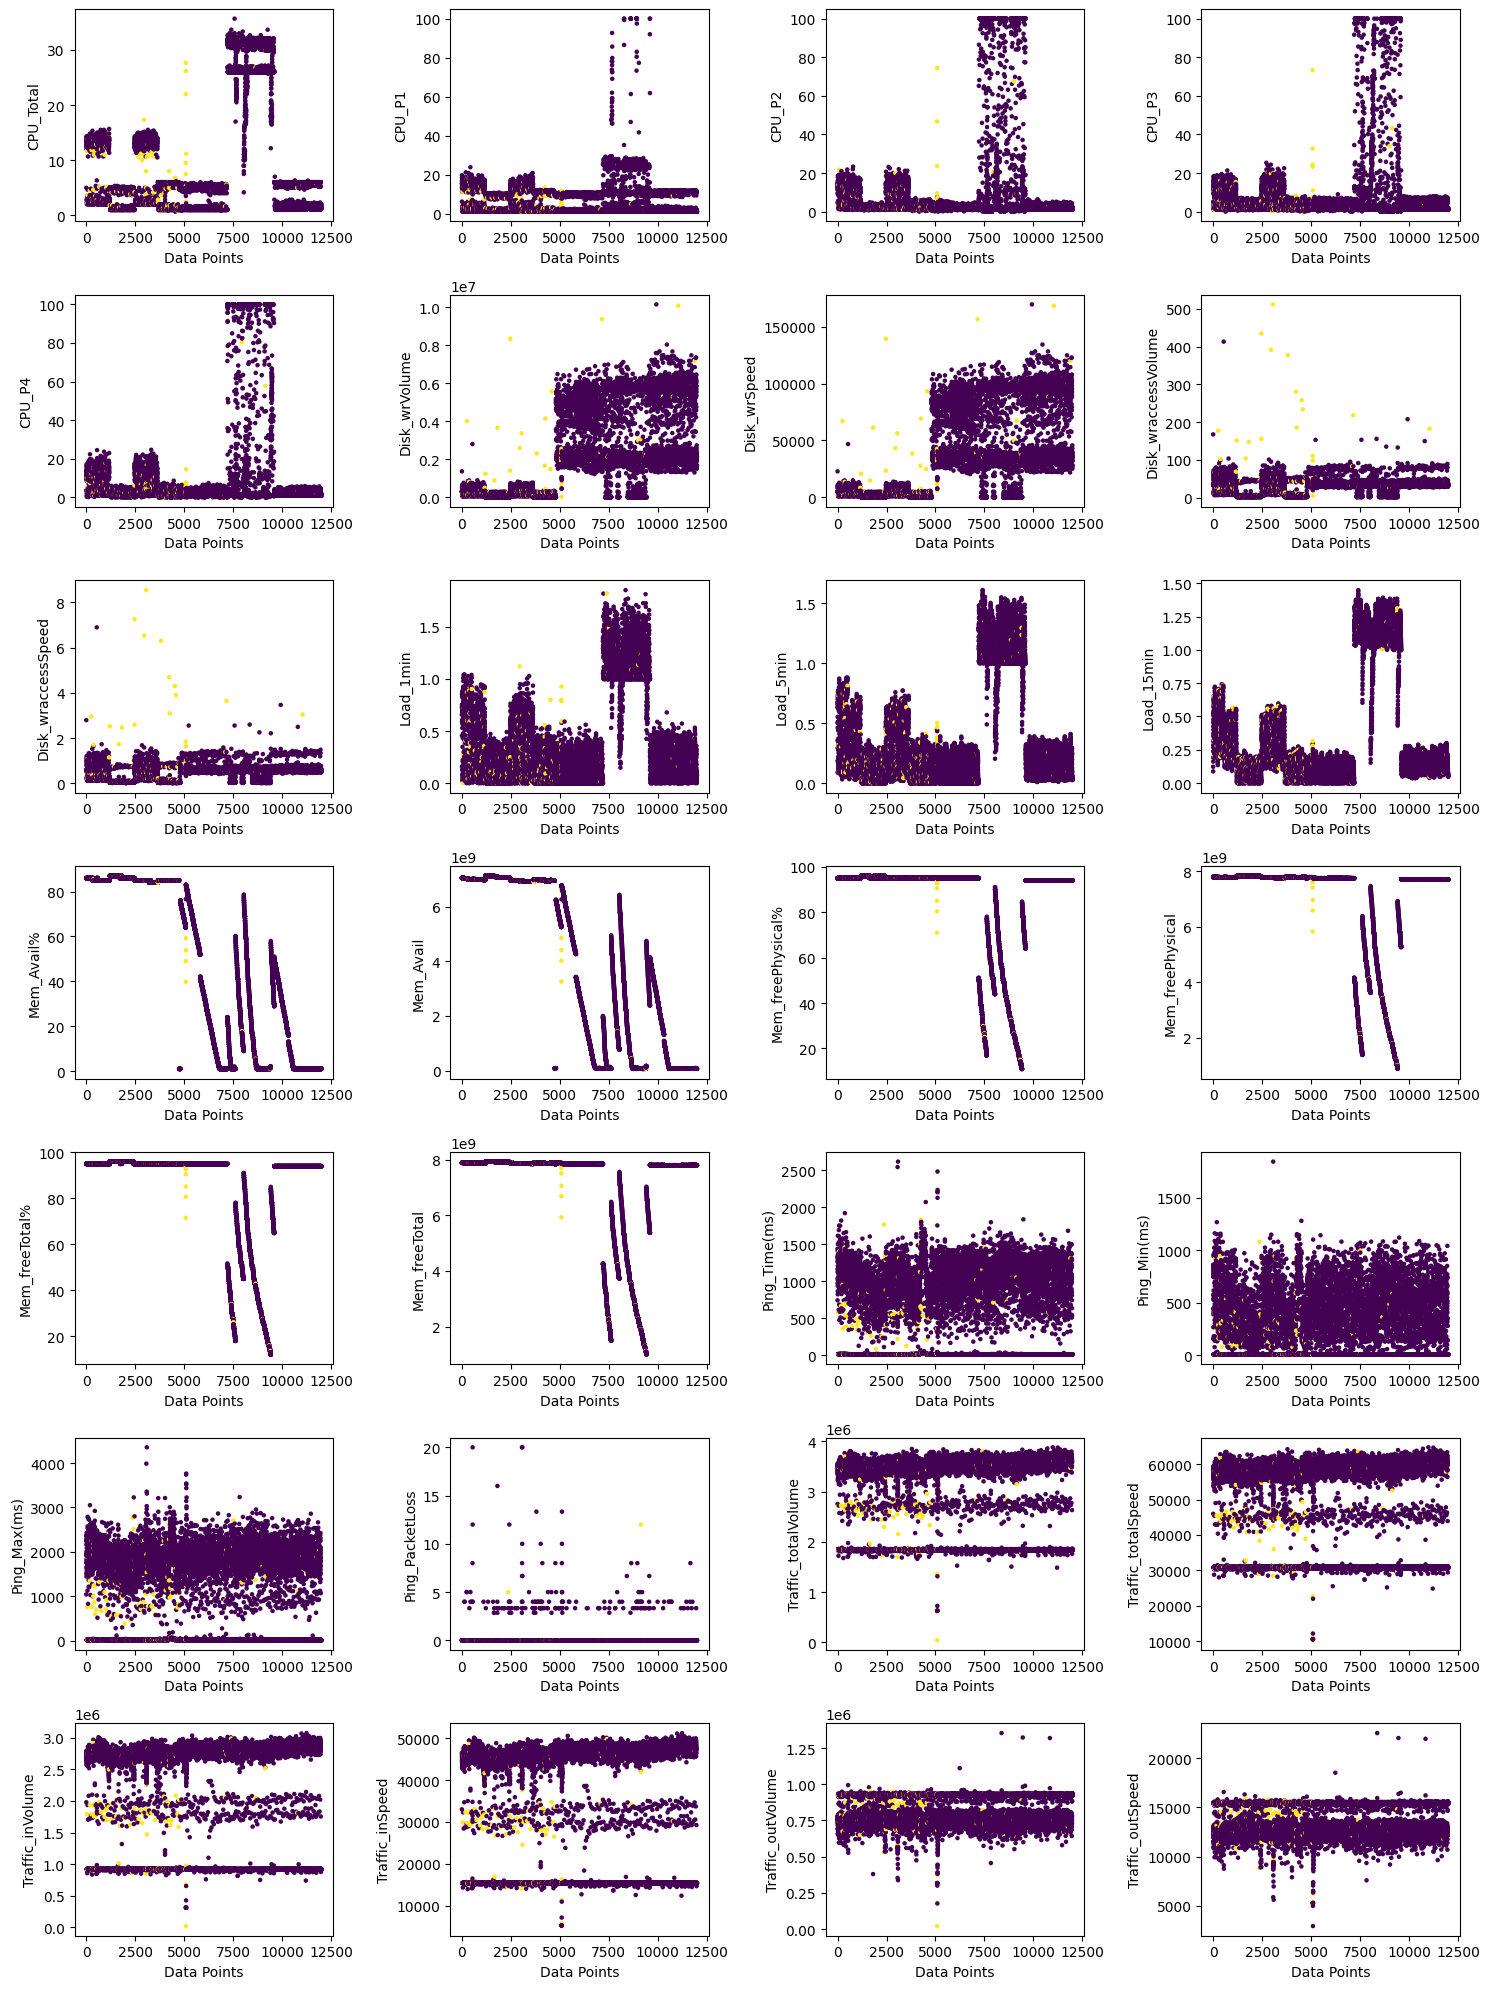

Modified data (replaced outliers) saved to modified_28f.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load your data (replace 'your_data.csv' with your actual file)
df = pd.read_csv('sniff_dataset_28f.csv')

# Exclude the 'Class' feature for LOF analysis
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['number'])

# Fit the LOF model for outlier detection
lof_model = LocalOutlierFactor(n_neighbors=4, contamination=0.02)  # You can adjust these parameters
outlier_scores = lof_model.fit_predict(numeric_columns)

# Create a boolean array indicating whether a data point is an outlier
outliers = outlier_scores == -1

# Plot all numeric features in one graph
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(7, 4, i)  # Assuming you have 9 or fewer numeric features, adjust as needed
    plt.scatter(range(len(df)), df[col], c=outliers, cmap='viridis', s=5, label='Data Points')
    plt.xlabel('Data Points')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Impute outliers with the maximum or minimum inlier value for each feature
for col in numeric_columns.columns:
    inlier_max = np.max(df.loc[~outliers, col])
    inlier_min = np.min(df.loc[~outliers, col])

    # Replace outliers with the maximum inlier value if higher than the maximum
    df.loc[(outliers) & (df[col] > inlier_max), col] = inlier_max

    # Replace outliers with the minimum inlier value if lower than the minimum
    df.loc[(outliers) & (df[col] < inlier_min), col] = inlier_min

# Save the modified DataFrame to a CSV file
modified_file_path = 'modified_28f.csv'
df.to_csv(modified_file_path, index=False)

print(f"Modified data (replaced outliers) saved to {modified_file_path}")

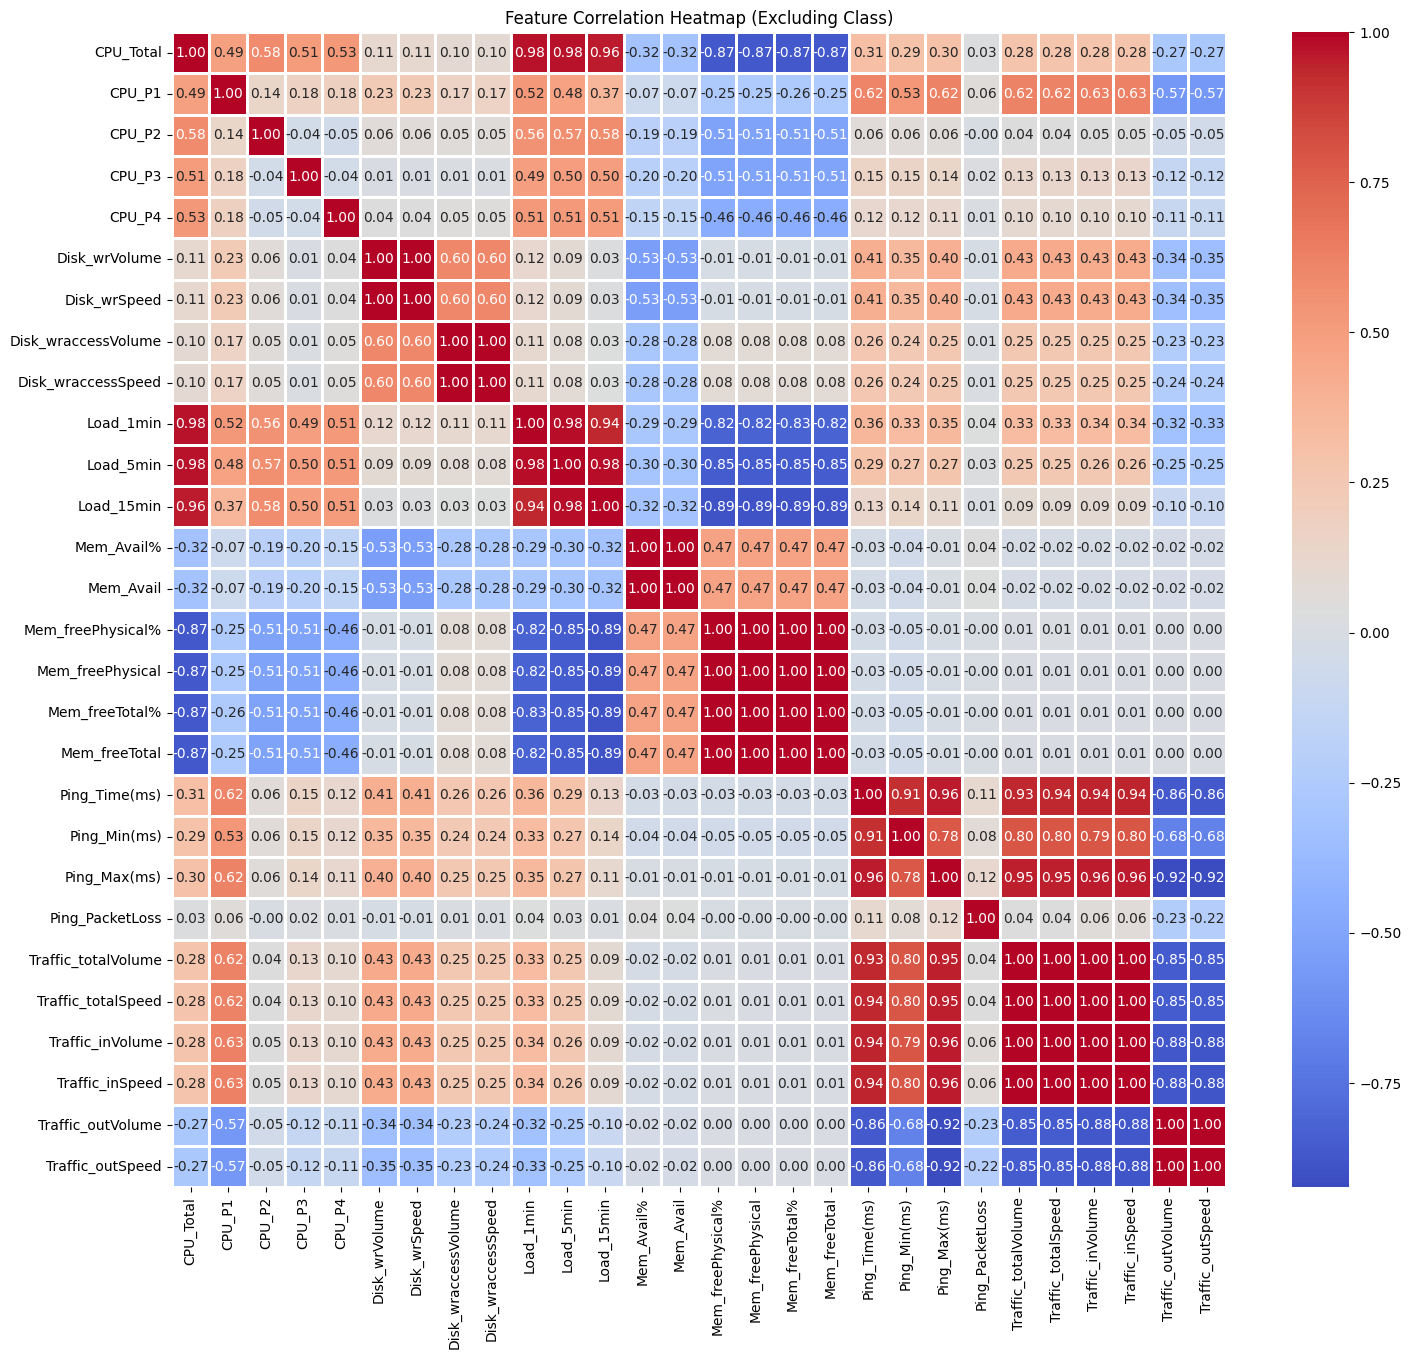

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('modified_28f.csv')
numeric_columns = df.drop(columns=['Class']).select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.8)
plt.title('Feature Correlation Heatmap (Excluding Class)')
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('modified_28f.csv')
df = df.drop(columns=[
    'Disk_wrSpeed', 
    'Disk_wraccessSpeed', 
    'Mem_Avail%',  
    'Mem_freePhysical%', 
    'Mem_freePhysical', 
    'Mem_freeTotal%', 
    'Traffic_totalVolume', 
    'Traffic_totalSpeed', 
    'Traffic_inSpeed', 
    'Traffic_outSpeed'
])
df.info()
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training_set_path = 'train__18f.csv'
training_set = pd.concat([X_train, y_train], axis=1)
training_set.to_csv(training_set_path, index=False)

test_set_path = 'test__18f.csv'
test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv(test_set_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CPU_Total            12000 non-null  float64
 1   CPU_P1               12000 non-null  float64
 2   CPU_P2               12000 non-null  float64
 3   CPU_P3               12000 non-null  float64
 4   CPU_P4               12000 non-null  float64
 5   Disk_wrVolume        12000 non-null  float64
 6   Disk_wraccessVolume  12000 non-null  float64
 7   Load_1min            12000 non-null  float64
 8   Load_5min            12000 non-null  float64
 9   Load_15min           12000 non-null  float64
 10  Mem_Avail            12000 non-null  float64
 11  Mem_freeTotal        12000 non-null  float64
 12  Ping_Time(ms)        12000 non-null  float64
 13  Ping_Min(ms)         12000 non-null  float64
 14  Ping_Max(ms)         12000 non-null  float64
 15  Ping_PacketLoss      12000 non-null 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
df1=pd.read_csv("modified_28f.csv")
X1 = df1.drop('Class', axis=1)  # Features
y1 = df1['Class']  # Target variable

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
training_set_path = 'train__28f.csv'
training_set = pd.concat([X_train1, y_train1], axis=1)
training_set.to_csv(training_set_path, index=False)

test_set_path = 'test__28f.csv'
test_set = pd.concat([X_test1, y_test1], axis=1)
test_set.to_csv(test_set_path, index=False)

Decision tree 28 features
Mean Accuracy: 99.80%
Mean Precision: 99.81%
Mean Recall: 99.80%
Mean F1 Score: 99.80%
Training Time: 2.70 seconds

Test Metrics:
Accuracy: 99.67%
Precision: 99.67%
Recall: 99.67%
F1 Score: 99.67%


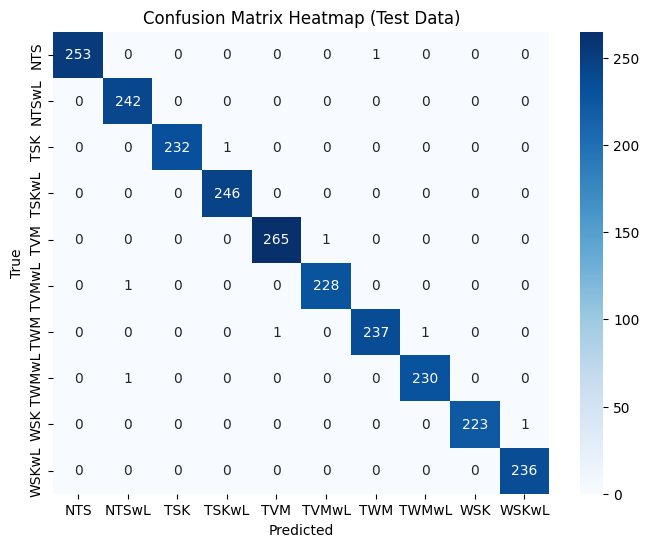

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("Decision tree 28 features")
train_file_path = 'train__28f.csv'
train_data = pd.read_csv(train_file_path)

test_file_path = 'test__28f.csv'
test_data = pd.read_csv(test_file_path)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()


Decision tree 18 features
Mean Accuracy: 99.82%
Mean Precision: 99.82%
Mean Recall: 99.82%
Mean F1 Score: 99.82%
Training Time: 1.79 seconds

Test Metrics:
Accuracy: 99.62%
Precision: 99.63%
Recall: 99.62%
F1 Score: 99.63%


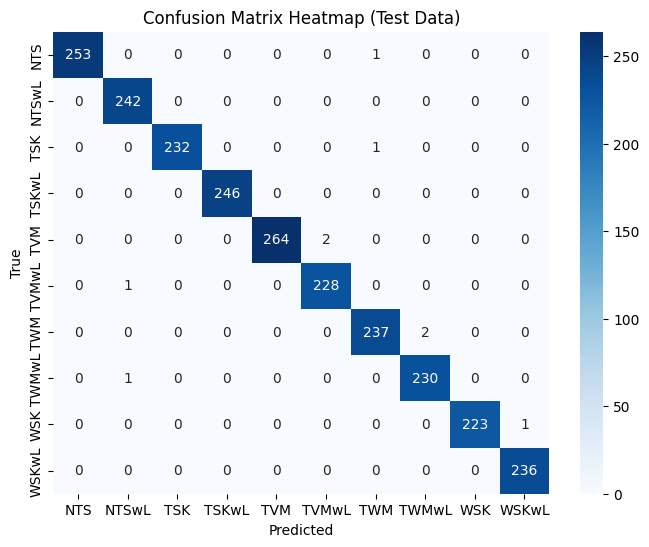

'decision_tree_graph.pdf'

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time

print("Decision tree 18 features")
train_file_path = 'train__18f.csv'
train_data = pd.read_csv(train_file_path)

test_file_path = 'test__18f.csv'
test_data = pd.read_csv(test_file_path)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()



# Plot Tree Graph using Graphviz
dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=X_train.columns,
                           class_names=label_encoder.classes_, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_graph", format="pdf", cleanup=True)
graph.view("decision_tree_graph")


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("Decision tree 7 features")
train_file_path = 'train__18f.csv'
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv'
test_data = pd.read_csv(test_file_path)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

#7 feature model
features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=42)

start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    decision_tree_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = decision_tree_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()
# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
decision_tree_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

joblib.dump(decision_tree_model, 'saved_models/dt_model.pkl') 
joblib.dump(label_encoder, 'saved_models/label_encoder.pkl') 

Decision tree 7 features
Training Time: 1.23 seconds
Test Accuracy: 99.62%


['saved_models/label_encoder.pkl']

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time
print("Random Forest Model trained 28 features")

train_file_path = 'train__28f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__28f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)
#resetting index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

features_to_drop = ['Class']

#target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate mean metrics over all folds
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

# Print mean metrics
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


Random Forest Model trained 28 features
Mean Accuracy: 99.83%
Mean Precision: 99.84%
Mean Recall: 99.83%
Mean F1 Score: 99.83%
Training Time: 39.60 seconds

Test Metrics:
Accuracy: 99.92%
Precision: 99.92%
Recall: 99.92%
F1 Score: 99.92%


 18 features
Mean Accuracy: 99.89%
Mean Precision: 99.89%
Mean Recall: 99.89%
Mean F1 Score: 99.89%
Training Time: 32.62 seconds

Test Metrics:
Accuracy: 99.92%
Precision: 99.92%
Recall: 99.92%
F1 Score: 99.92%


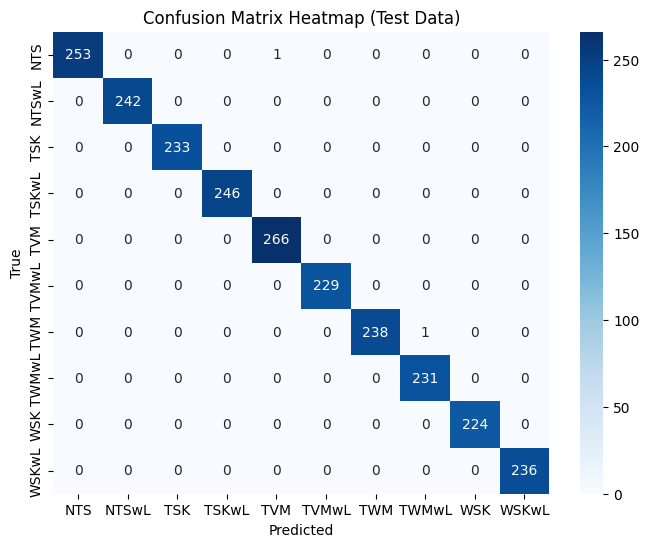

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print(" 18 features")

train_file_path = 'train__18f.csv'  
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv' 
test_data = pd.read_csv(test_file_path)
#resetting index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 18 features
features_to_drop = ['Class']

#target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate mean metrics over all folds
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

# Print mean metrics
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")

# print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib 

print(" Random forest 7 feautres")

train_file_path = 'train__18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

# Reset index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop List for 7 features
features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

#target variable is named 'Class' and features are other columns
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

# 'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)

# Perform 10-fold cross-validation on the training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Record the start time
start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    random_forest_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = random_forest_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Record the end time
end_time = time.time()

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_encoded, y_test_pred)

# Print test metrics
print("\nTest Metrics:")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

joblib.dump(random_forest_model, 'saved_models/rf_model.pkl') 
joblib.dump(label_encoder, 'saved_models/label_encoder.pkl') 

 Random forest 7 feautres
Training Time: 24.91 seconds

Test Metrics:
Test Accuracy: 99.83%


['saved_models/label_encoder.pkl']

XGBoost classifier 28 features
Mean Accuracy: 99.79%
Mean Precision: 99.79%
Mean Recall: 99.79%
Mean F1 Score: 99.79%
Training Time: 27.48 seconds

Test Metrics:
Accuracy: 99.83%
Precision: 99.83%
Recall: 99.83%
F1 Score: 99.83%


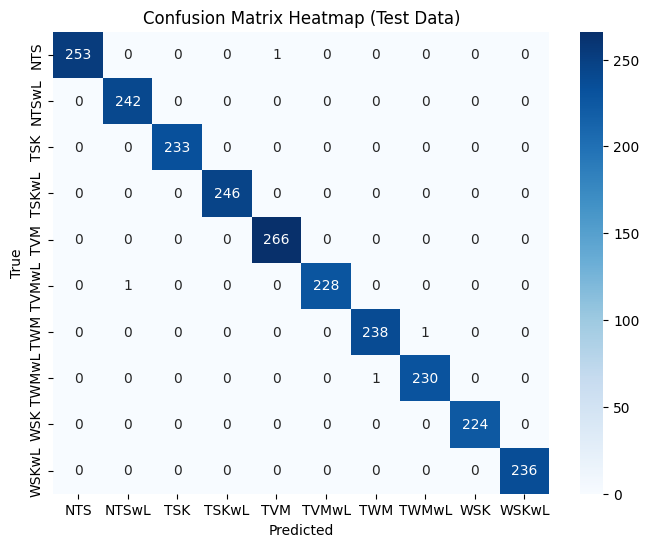

In [15]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import to_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import subprocess
import time
print("XGBoost classifier 28 features")

train_file_path = 'train__28f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__28f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

features_to_drop = ['Class']


X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize xgb model
xgb_model = XGBClassifier(max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

  
    xgb_model.fit(X_train_fold, y_train_fold)

    y_val_pred = xgb_model.predict(X_val_fold)

   
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

xgb_model.fit(X_train, y_train_encoded)


y_test_pred = xgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')


print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

XGBoost classifier 18 features
Mean Accuracy: 99.80%
Mean Precision: 99.80%
Mean Recall: 99.80%
Mean F1 Score: 99.80%
Training Time: 19.82 seconds

Test Metrics:
Accuracy: 99.79%
Precision: 99.79%
Recall: 99.79%
F1 Score: 99.79%


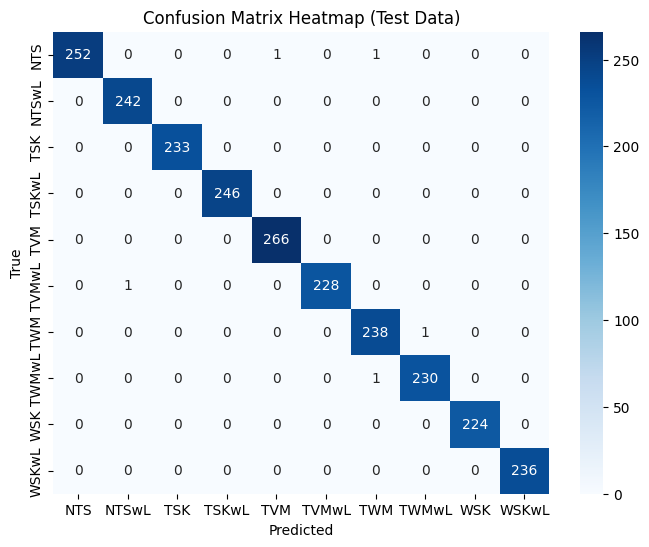

In [16]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import to_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import subprocess
import time
print("XGBoost classifier 18 features")

train_file_path = 'train__18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

features_to_drop = ['Class']


X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
#initialize xgb model
xgb_model = XGBClassifier(max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

  
    xgb_model.fit(X_train_fold, y_train_fold)

    y_val_pred = xgb_model.predict(X_val_fold)

   
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()

mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

xgb_model.fit(X_train, y_train_encoded)


y_test_pred = xgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')


print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

In [17]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import to_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import subprocess
import time
import joblib

print("XGBoost 7 features")

train_file_path = 'train__18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)


features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

#target variable is named 'Class'
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize xgb model
xgb_model = XGBClassifier(max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    xgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = xgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


xgb_model.fit(X_train, y_train_encoded)


y_test_pred = xgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)



print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
joblib.dump(xgb_model, 'saved_models/xgb_model.pkl') 
joblib.dump(label_encoder, 'saved_models/label_encoder.pkl')



XGBoost 7 features
Training Time: 16.92 seconds

Test Metrics:
Accuracy: 99.92%


['saved_models/label_encoder.pkl']

Lightgbm 28 features
Mean Accuracy: 99.79%
Mean Precision: 99.79%
Mean Recall: 99.79%
Mean F1 Score: 99.79%
Training Time: 1136.17 seconds

Test Metrics:
Accuracy: 99.79%
Precision: 99.79%
Recall: 99.79%
F1 Score: 99.79%


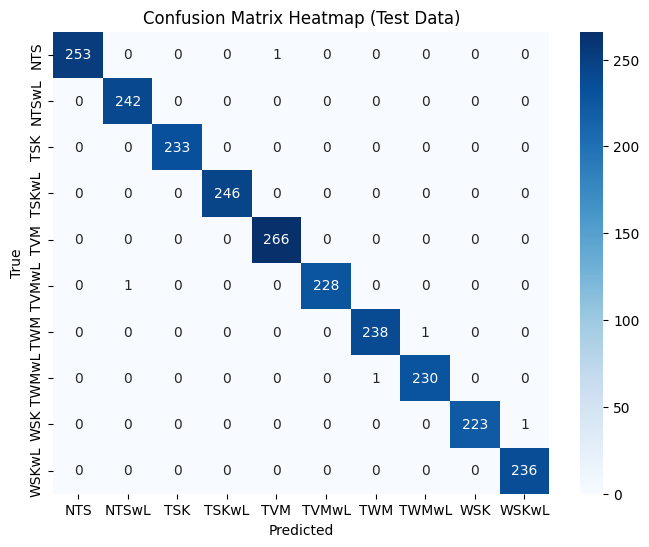

In [18]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print("Lightgbm 28 features")

train_file_path = 'train__28f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__28f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)



labels_to_drop = [''] 


train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the LightGBM model
lgb_model = LGBMClassifier(verbose=-1, max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    lgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()


mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)


print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


lgb_model.fit(X_train, y_train_encoded)


y_test_pred = lgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')


print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

Lightgbm 18 features
Mean Accuracy: 99.76%
Mean Precision: 99.76%
Mean Recall: 99.76%
Mean F1 Score: 99.76%
Training Time: 38.24 seconds

Test Metrics:
Accuracy: 99.71%
Precision: 99.71%
Recall: 99.71%
F1 Score: 99.71%


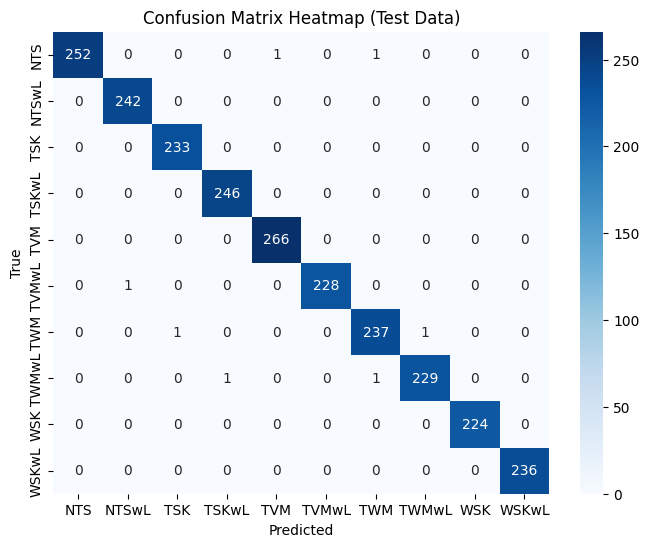

In [19]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print("Lightgbm 18 features")

train_file_path = 'train__18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)



labels_to_drop = [''] 


train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


features_to_drop = ['Class']

X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the LightGBM model
lgb_model = LGBMClassifier(verbose=-1, max_depth=7, random_state=42)


stratified_kfold = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    lgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()


mean_accuracy = sum(accuracy_list) / len(accuracy_list)
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)


print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision * 100:.2f}%")
print(f"Mean Recall: {mean_recall * 100:.2f}%")
print(f"Mean F1 Score: {mean_f1 * 100:.2f}%")


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


lgb_model.fit(X_train, y_train_encoded)


y_test_pred = lgb_model.predict(X_test)


accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
precision_test = precision_score(y_test_encoded, y_test_pred, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred, average='weighted')


print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print(f"Precision: {precision_test * 100:.2f}%")
print(f"Recall: {recall_test * 100:.2f}%")
print(f"F1 Score: {f1_test * 100:.2f}%")


conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

In [20]:
from lightgbm import LGBMClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("Lightgbm 7 features")

train_file_path = 'train__18f.csv'
train_data = pd.read_csv(train_file_path)


test_file_path = 'test__18f.csv' 
test_data = pd.read_csv(test_file_path)


features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']


X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

# 'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#initialize xlight gbm model
lgb_model = LGBMClassifier(verbose=-1, max_depth=7, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)



start_time = time.time()

for train_index, val_index in stratified_kfold.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Train the model on the training fold
    lgb_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lgb_model.predict(X_val_fold)

    # Evaluate the model on the validation fold
    accuracy_list.append(accuracy_score(y_val_fold, y_val_pred))
    precision_list.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_val_pred, average='weighted'))


end_time = time.time()


training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


lgb_model.fit(X_train, y_train_encoded)


y_test_pred = lgb_model.predict(X_test)

accuracy_test = accuracy_score(y_test_encoded, y_test_pred)
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")

joblib.dump(lgb_model, 'saved_models/lgb_model.pkl')  
joblib.dump(label_encoder, 'saved_models/label_encoder.pkl') 


Lightgbm 7 features
Training Time: 30.47 seconds

Test Metrics:
Accuracy: 99.79%


['saved_models/label_encoder.pkl']

In [21]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
print("Keeping only the ping factors to check how rtt based detection works ")

train_data = pd.read_csv('train__18f.csv')
test_data = pd.read_csv('test__18f.csv')


features_to_drop = ['Class', 'CPU_Total', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4',
                    'Disk_wrVolume', 'Disk_wraccessVolume', 'Load_1min', 'Load_5min',
                    'Load_15min', 'Mem_Avail', 'Mem_freeTotal', 'Traffic_inVolume',
                    'Traffic_outVolume']


class_pairs = [
    ('NTS', 'TVM'),
    ('NTS', 'WSK'),
    ('NTSwL', 'TVMwL'),
    ('NTSwL', 'WSKwL')
]

# Models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=7, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42),
    'XGBoost': XGBClassifier(max_depth=7, random_state=42),
    'LightGBM': LGBMClassifier(verbose=-1, max_depth=7, random_state=42)
}

# Run evaluations
for label1, label2 in class_pairs:
    print(f"\n{label1} - {label2}")
    
    train_subset = train_data[train_data['Class'].isin([label1, label2])]
    test_subset = test_data[test_data['Class'].isin([label1, label2])]

    X_train = train_subset.drop(features_to_drop, axis=1)
    y_train = train_subset['Class']
    X_test = test_subset.drop(features_to_drop, axis=1)
    y_test = test_subset['Class']

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test_encoded, y_pred) * 100
        print(f"{model_name} Accuracy: {acc:.2f}%")


Keeping only the ping factors to check how rtt based detection works 

NTS - TVM
Decision Tree Accuracy: 84.23%
Random Forest Accuracy: 83.85%
XGBoost Accuracy: 86.35%
LightGBM Accuracy: 86.15%

NTS - WSK
Decision Tree Accuracy: 64.85%
Random Forest Accuracy: 66.53%
XGBoost Accuracy: 61.72%
LightGBM Accuracy: 67.15%

NTSwL - TVMwL
Decision Tree Accuracy: 63.91%
Random Forest Accuracy: 66.88%
XGBoost Accuracy: 65.82%
LightGBM Accuracy: 64.76%

NTSwL - WSKwL
Decision Tree Accuracy: 67.99%
Random Forest Accuracy: 68.62%
XGBoost Accuracy: 66.32%
LightGBM Accuracy: 67.57%


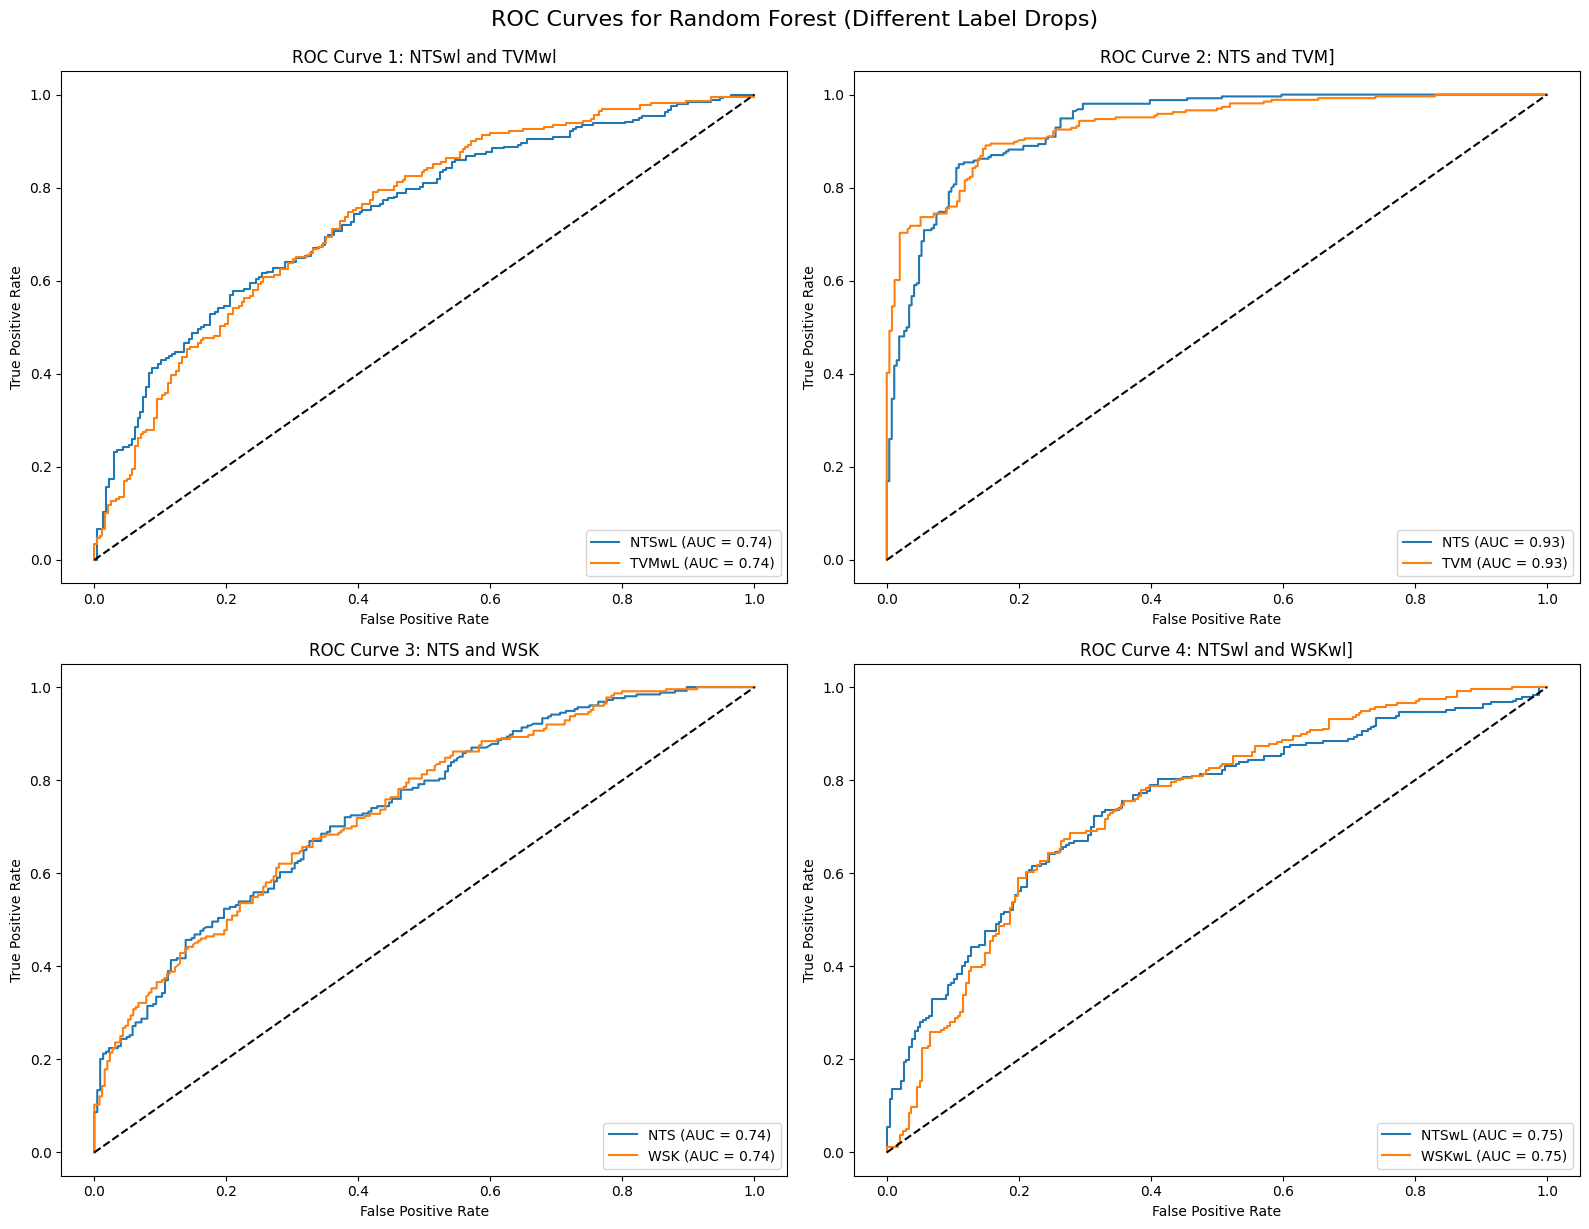

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder


label_drop_sets = [
    ['TVM','NTS','TWM','WSK','TSK','TWMwL','WSKwL','TSKwL'],
    ['NTSwL','TVMwL','TWM','WSK','TSK','TWMwL','WSKwL','TSKwL'],
    ['TVM','NTSwL','TVMwL','TWM','TSK','TWMwL','WSKwL','TSKwL'],
    ['WSK','NTS','TVM','TVMwL','TWM','TSK','TWMwL','TSKwL']
]


titles = [
    "ROC Curve 1: NTSwl and TVMwl",
    "ROC Curve 2: NTS and TVM]",
    "ROC Curve 3: NTS and WSK",
    "ROC Curve 4: NTSwl and WSKwl]"
]


features_to_drop = ['Class', 'CPU_Total', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4',
                    'Disk_wrVolume', 'Disk_wraccessVolume', 'Load_1min', 'Load_5min',
                    'Load_15min', 'Mem_Avail', 'Mem_freeTotal', 'Traffic_inVolume',
                    'Traffic_outVolume']


train_data = pd.read_csv('train__18f.csv')
test_data = pd.read_csv('test__18f.csv')


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, labels_to_drop in enumerate(label_drop_sets):
    # Drop specified labels
    train_filtered = train_data[~train_data['Class'].isin(labels_to_drop)].copy()
    test_filtered = test_data[~test_data['Class'].isin(labels_to_drop)].copy()

   
    X_train = train_filtered.drop(features_to_drop, axis=1)
    y_train = train_filtered['Class']
    X_test = test_filtered.drop(features_to_drop, axis=1)
    y_test = test_filtered['Class']

   
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    unique_classes = y_test.unique()

    
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    rf_model.fit(X_train, y_train_encoded)

    
    y_test_proba = rf_model.predict_proba(X_test)

    # One-hot encode true labels
    y_test_one_hot = pd.get_dummies(y_test_encoded, columns=label_encoder.classes_)

    # Plot ROC for each class
    ax = axes[idx]
    n_classes = len(label_encoder.classes_)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_one_hot.iloc[:, i], y_test_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'{unique_classes[i]} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(titles[idx])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.suptitle("ROC Curves for Random Forest (Different Label Drops)", fontsize=16, y=1.02)
plt.show()


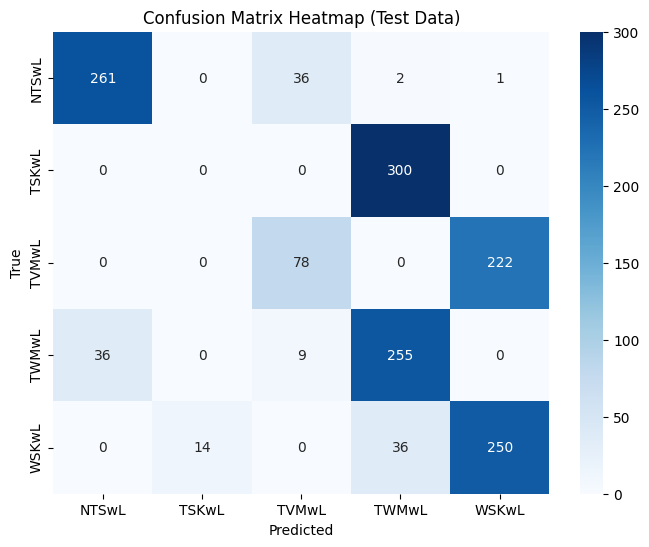

In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time


train_file_path = 'train__18f.csv' 
train_data = pd.read_csv(train_file_path)


test_file_path = 'extra_18f.csv'  
test_data = pd.read_csv(test_file_path)

labels_to_drop = ['NTS','TVM','TWM','WSK','TSK']  # Add the labels you want to drop

# Drop rows with specified labels from 'Class' column
train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

# target variable is named 'Class'
X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

#'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)


random_forest_model.fit(X_train, y_train_encoded)

y_test_pred = random_forest_model.predict(X_test)

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()



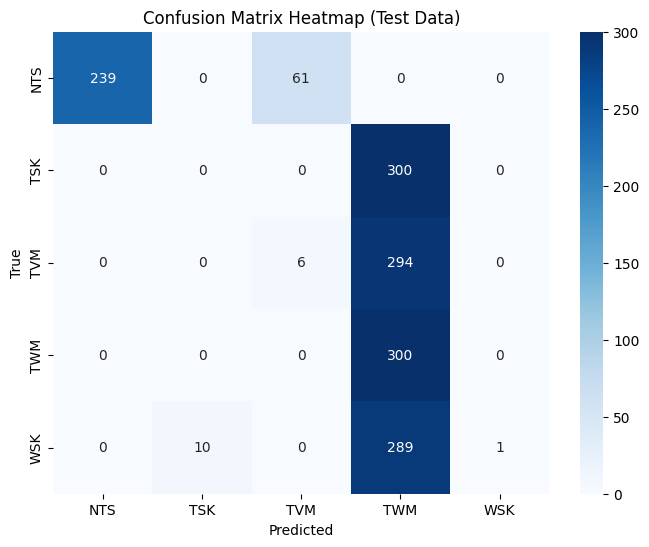

In [24]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time


train_file_path = 'train__18f.csv'  # Update with the path to your training data
train_data = pd.read_csv(train_file_path)


test_file_path = 'extra_18f.csv'  # Update with the path to your test data
test_data = pd.read_csv(test_file_path)

labels_to_drop = ['NTSwL','TVMwL','TWMwL','WSKwL','TSKwL']  # Add the labels you want to drop


train_data = train_data[~train_data['Class'].isin(labels_to_drop)]
test_data = test_data[~test_data['Class'].isin(labels_to_drop)]


train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

features_to_drop = ['Class', 'CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4', 'Load_1min', 'Load_5min', 'Load_15min', 'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']


X_train = train_data.drop(features_to_drop, axis=1)
y_train = train_data['Class']
X_test = test_data.drop(features_to_drop, axis=1)
y_test = test_data['Class']

# 'Class' column contains categorical labels, encode them using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42)


# Train the model on the entire training data
random_forest_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_test_pred = random_forest_model.predict(X_test)

# Plot Confusion Matrix Heatmap for the test data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()



In [25]:
import pandas as pd
import joblib

# Loading the model
model = joblib.load('saved_models/rf_model.pkl')
label_encoder = joblib.load('saved_models/label_encoder.pkl')

# Input feature names
feature_names = ['CPU_Total', 'Disk_wrVolume', 'Disk_wraccessVolume', 
                 'Mem_Avail', 'Mem_freeTotal', 'Traffic_inVolume', 'Traffic_outVolume']

# Manual input values
manual_input = pd.DataFrame(
    [[6, 6486569.143, 40.3013, 3873133227, 7805373099, 2749057.941, 746987.8727]],
    columns=feature_names
)


pred_encoded = model.predict(manual_input)
pred_decoded = label_encoder.inverse_transform(pred_encoded)

# Output result
print(f"\n Predicted Class for the entered input: {pred_decoded[0]}")



 Predicted Class for the entered input: TSKwL


In [26]:
import pandas as pd
import joblib

# Load the saved model and label encoder
model = joblib.load('saved_models/lgb_model.pkl') 
label_encoder = joblib.load('saved_models/label_encoder.pkl')


test_file_path = 'extra_18f.csv'


new_data = pd.read_csv(test_file_path)

# Drop unused features 
features_to_drop1 = ['CPU_P1', 'CPU_P2', 'CPU_P3', 'CPU_P4',
                     'Load_1min', 'Load_5min', 'Load_15min',
                     'Ping_Time(ms)', 'Ping_Min(ms)', 'Ping_Max(ms)', 'Ping_PacketLoss']

# Keep relevant features + target class
features_used = new_data.drop(columns=features_to_drop1)

# Separate features for prediction (exclude 'Class')
features_only = features_used.drop(columns=['Class'])

# Predict using the loaded model
predictions_encoded = model.predict(features_only)

# Decode predictions
predictions_decoded = label_encoder.inverse_transform(predictions_encoded)

# Append predictions to the dataframe
features_used['Predicted_Class'] = predictions_decoded

# Show results
print("\nPredictions for the new input data:")
print(features_used[['Class', 'Predicted_Class']])

# Save predictions to CSV
output_csv_path = 'predictions.csv'
features_used.to_csv(output_csv_path, index=False)
print(f"\n Predictions saved to: {output_csv_path}")
from sklearn.metrics import accuracy_score

# Calculate accuracy
true_labels = features_used['Class']
predicted_labels = features_used['Predicted_Class']

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\n Prediction Accuracy: {accuracy * 100:.2f}%")



Predictions for the new input data:
      Class Predicted_Class
0       TWM             NTS
1       TWM             NTS
2       TWM             TWM
3       TWM             NTS
4       TWM             NTS
...     ...             ...
2995  TSKwL             TWM
2996  TSKwL             TWM
2997  TSKwL             TWM
2998  TSKwL             TWM
2999  TSKwL             TWM

[3000 rows x 2 columns]

 Predictions saved to: predictions.csv

 Prediction Accuracy: 13.73%
